In [1]:
pip install numpy opencv-python ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
cap = cv2.VideoCapture("/content/drive/MyDrive/yolosample.mp4")

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = "/content/drive/MyDrive/yolosample.mp4".split('.')[0] + '_tracked.mp4'
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

In [ ]:
from collections import defaultdict
track_history = defaultdict(lambda: [])

In [ ]:
while cap.isOpened():
    success, frame = cap.read()
    if success:
        results = model.track(frame, persist=True)

        if results[0].boxes and results[0].boxes.id is not None:
            boxes = results[0].boxes.xywh.cpu()
            track_ids = results[0].boxes.id.int().cpu().tolist()

            annotated_frame = results[0].plot()

            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                track = track_history[track_id]
                track.append((float(x), float(y)))
                if len(track) > 30:
                    track.pop(0)

                points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
                cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)

            out.write(annotated_frame)
    else:
        break

Streaming output truncated to the last 5000 lines.
0: 384x640 7 cars, 1 truck, 204.1ms
Speed: 3.9ms preprocess, 204.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 truck, 224.8ms
Speed: 3.9ms preprocess, 224.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 truck, 198.3ms
Speed: 3.9ms preprocess, 198.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 truck, 207.1ms
Speed: 4.0ms preprocess, 207.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 truck, 213.9ms
Speed: 3.8ms preprocess, 213.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 truck, 218.8ms
Speed: 6.7ms preprocess, 218.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 bus, 212.1ms
Speed: 5.0ms preprocess, 212.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384

In [ ]:
cap.release()

In [ ]:
out.release()

In [ ]:
cv2.destroyAllWindows()

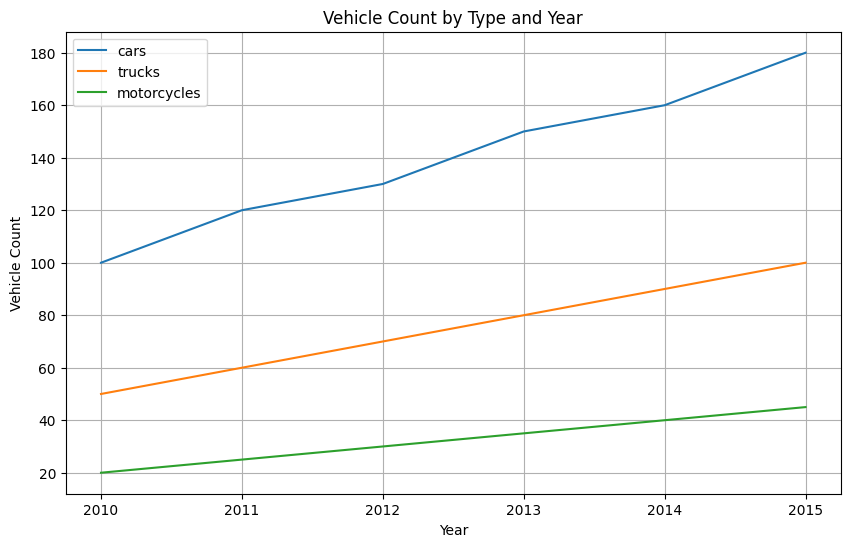

In [ ]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
vehicle_counts = {
    'cars': [100, 120, 130, 150, 160, 180],
    'trucks': [50, 60, 70, 80, 90, 100],
    'motorcycles': [20, 25, 30, 35, 40, 45]
}

plt.figure(figsize=(10, 6))

for vehicle_type, counts in vehicle_counts.items():
    plt.plot(years, counts, label=vehicle_type)

plt.xlabel('Year')
plt.ylabel('Vehicle Count')
plt.title('Vehicle Count by Type and Year')
plt.legend()
plt.grid(True)

plt.show()


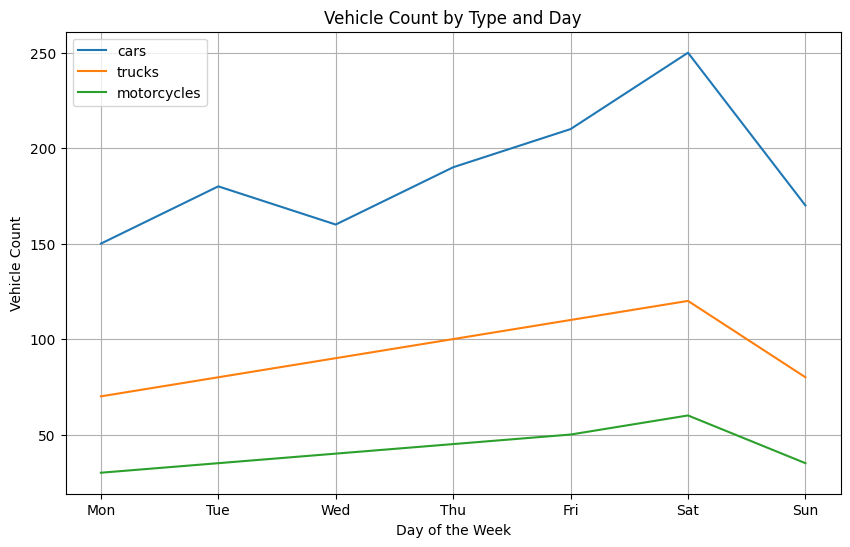

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
vehicle_counts_week = {
    'cars': [150, 180, 160, 190, 210, 250, 170],
    'trucks': [70, 80, 90, 100, 110, 120, 80],
    'motorcycles': [30, 35, 40, 45, 50, 60, 35]
}

plt.figure(figsize=(10, 6))

for vehicle_type, counts in vehicle_counts_week.items():
    plt.plot(days, counts, label=vehicle_type)

plt.xlabel('Day of the Week')
plt.ylabel('Vehicle Count')
plt.title('Vehicle Count by Type and Day')
plt.legend()
plt.grid(True)

plt.show()


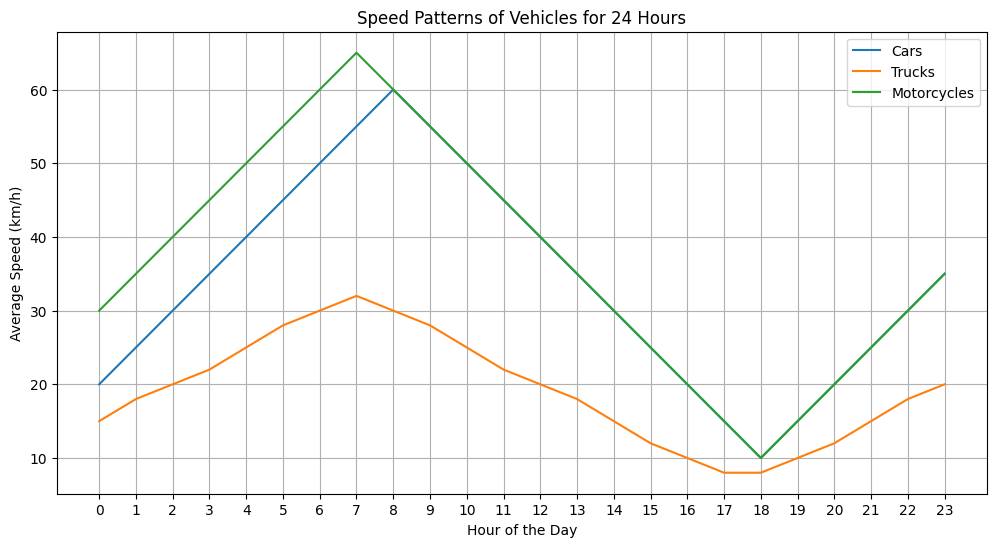

In [ ]:
hours = list(range(24))
speed_patterns = {
    'Cars': [20, 25, 30, 35, 40, 45, 50, 55, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 15, 20, 25, 30, 35],
    'Trucks': [15, 18, 20, 22, 25, 28, 30, 32, 30, 28, 25, 22, 20, 18, 15, 12, 10, 8, 8, 10, 12, 15, 18, 20],
    'Motorcycles': [30, 35, 40, 45, 50, 55, 60, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 15, 20, 25, 30, 35]
}

plt.figure(figsize=(12, 6))

for vehicle_type, speeds in speed_patterns.items():
    plt.plot(hours, speeds, label=vehicle_type)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Speed Patterns of Vehicles for 24 Hours')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))

plt.show()
